In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! pip install tensorflow
# ! pip install tensorflow-gpu
# ! pip install keras-tuner 

###**Importing libraries**

In [3]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
from keras_tuner import RandomSearch

In [7]:
import warnings
warnings.filterwarnings('ignore')

###**Data reading**

In [8]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
 
df0 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/0.csv")
df0 = df0.drop(df0.columns[0], axis=1)  

df1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/1.csv")
df1 = df1.drop(df1.columns[0], axis=1)  

df2 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/2.csv")
df2 = df2.drop(df2.columns[0], axis=1)  

df3 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/3.csv")
df3 = df3.drop(df3.columns[0], axis=1)  

df4 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/4.csv")
df4 = df4.drop(df4.columns[0], axis=1)  

d0 = np.array(df0)
d1 = np.array(df1)
d2 = np.array(df2)
d3 = np.array(df3)
d4 = np.array(df4)

###**Data pre-processing**

In [9]:
X_train = []
Y_train = []

for i in range(2000):
  X_train.append(d1[i])
  Y_train.append(1)

for i in range(500):
  X_train.append(d0[i])
  Y_train.append(0)

  X_train.append(d2[i])
  Y_train.append(0)

  X_train.append(d3[i])
  Y_train.append(0)

  X_train.append(d4[i])
  Y_train.append(0)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
X_test = []
Y_test = []

for i in range(500):
  X_test.append(d1[2000+i])
  Y_test.append(1)

for i in range(125):
  X_test.append(d0[500+i])
  Y_test.append(0)

  X_test.append(d2[500+i])
  Y_test.append(0)

  X_test.append(d3[500+i])
  Y_test.append(0)

  X_test.append(d4[500+i])
  Y_test.append(0)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [11]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [12]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

###**Hyperparameters tuning**

In [13]:
def MLP2_tuning(hp):

  model = Sequential()
  model.add(Dense(hp.Int('hidden layer 1', min_value=500, max_value=2001, step=500), activation='relu', input_shape=(500, )))
  model.add(Dense(hp.Int('hidden layer 2', min_value=500, max_value=2001, step=500), activation='relu'))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [14]:
tuner = RandomSearch(MLP2_tuning,
                     objective='val_accuracy',
                     max_trials=100,
                     executions_per_trial=5,
                     project_name='tuning')

tuner.search(x=X_train, y=Y_train,
             epochs=50,
             batch_size=32,
             validation_data=(X_valid, Y_valid))       

Trial 15 Complete [00h 03m 07s]
val_accuracy: 0.7251999974250793

Best val_accuracy So Far: 0.7251999974250793
Total elapsed time: 00h 54m 18s
INFO:tensorflow:Oracle triggered exit


In [15]:
print('BEST PARAMETERS')
print('hidden layer 1:', tuner.get_best_hyperparameters()[0].values['hidden layer 1'])
print('hidden layer 2:', tuner.get_best_hyperparameters()[0].values['hidden layer 2'])

BEST PARAMETERS
hidden layer 1: 1000
hidden layer 2: 1500


###**Final model training**

In [16]:
def MLP2():

  model = Sequential()
  model.add(Dense(1000, activation='relu', input_shape=(500,)))
  model.add(Dense(2000, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              501000    
                                                                 
 dense_4 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_5 (Dense)             (None, 2)                 4002      
                                                                 
Total params: 2,507,002
Trainable params: 2,507,002
Non-trainable params: 0
_________________________________________________________________
None






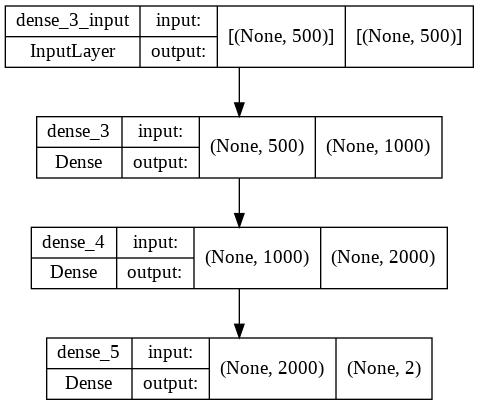

In [17]:
mlp2 = MLP2()
print(mlp2.summary())
print('\n')
print('\n')
plot_model(mlp2, to_file='mlp2.png', show_shapes=True, show_layer_names=True)

In [18]:
history = mlp2.fit(X_train, Y_train, 
                   batch_size=32,
                   epochs=50, 
                   validation_data=[X_valid, Y_valid],
                   verbose=1)

Epoch 1/50
125/125 [==============================] - 1s 7ms/step - loss: 0.6250 - accuracy: 0.6310 - val_loss: 0.6151 - val_accuracy: 0.6260
Epoch 2/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5944 - accuracy: 0.6675 - val_loss: 0.5966 - val_accuracy: 0.6680
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.5921 - accuracy: 0.6547 - val_loss: 0.6007 - val_accuracy: 0.6680
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.5800 - accuracy: 0.6725 - val_loss: 0.5631 - val_accuracy: 0.6720
Epoch 5/50
125/125 [==============================] - 1s 5ms/step - loss: 0.5760 - accuracy: 0.6725 - val_loss: 0.5712 - val_accuracy: 0.6980
Epoch 6/50
125/125 [==============================] - 1s 5ms/step - loss: 0.5705 - accuracy: 0.6752 - val_loss: 0.5749 - val_accuracy: 0.6720
Epoch 7/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5683 - accuracy: 0.6745 - val_loss: 0.6080 - val_accuracy: 0.6900
Epoch 

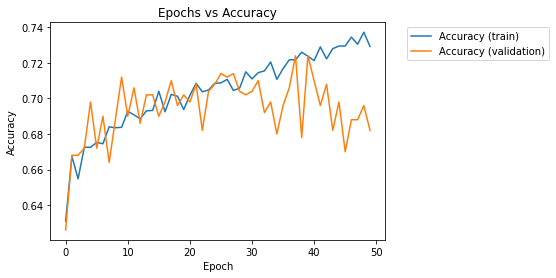

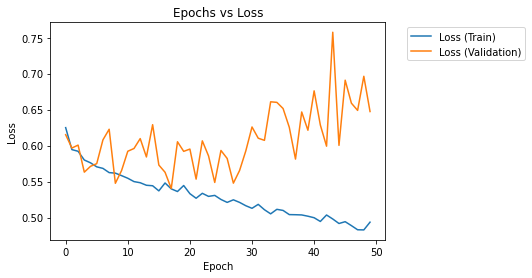

In [19]:
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label = 'Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [20]:
Y_pred_train = np.argmax(mlp2.predict(X_train), axis=1)
Y_pred_test = np.argmax(mlp2.predict(X_test), axis=1)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.90      0.56      0.69      2000
           1       0.68      0.94      0.79      2000

    accuracy                           0.75      4000
   macro avg       0.79      0.75      0.74      4000
weighted avg       0.79      0.75      0.74      4000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.83      0.58      0.68       260
           1       0.66      0.87      0.75       240

    accuracy                           0.72       500
   macro avg       0.74      0.73      0.72       500
weighted avg       0.75      0.72      0.71       500



Train CM


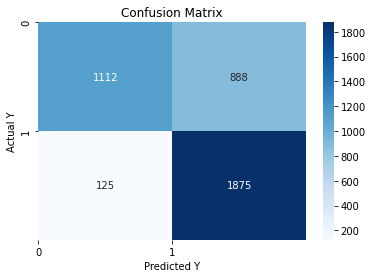





Test CM


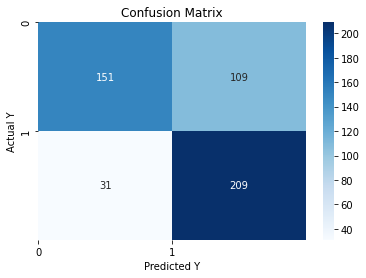

In [21]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()